# Introduction

### About Columns :

**Diabetes_binary** : you have diabetes (0,1)

**HighBP** : Adults who have been told they have high blood pressure by a doctor, nurse, or other health professional (0,1)

**HighChol** : Have you EVER been told by a doctor, nurse or other health professional that your blood cholesterol is high? (0,1)

**CholCheck** : Cholesterol check within past five years (0,1)

**BMI** : Body Mass Index (BMI)

**Smoker** : Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] (0,1)

**Stroke** : (Ever told) you had a stroke. (0,1)

**HeartDiseaseorAttack** : Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI) (0,1)

**PhysActivity** : Adults who reported doing physical activity or exercise during the past 30 days other than their regular job (0,1)

**Fruits** : Consume Fruit 1 or more times per day (0,1)

**Veggies** : Consume Vegetables 1 or more times per day (0,1)

**HvyAlcoholConsump** : Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week)(0,1)

**AnyHealthcare** : Do you have any kind of health care coverage, including health insurance, prepaid plans such as HMOs, or government plans such as Medicare, or Indian Health Service? (0,1)

**NoDocbcCost** : Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? (0,1)

**GenHlth** : Would you say that in general your health is: rate (1 ~ 5)

**MentHlth** : Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? (0 ~ 30)

**PhysHlth** : Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? (0 ~ 30)

**DiffWalk** : Do you have serious difficulty walking or climbing stairs? (0,1)

**Sex** : Indicate sex of respondent (0,1) (Female or Male)

**Age** : Fourteen-level age category (1 ~ 14)

**Education** : What is the highest grade or year of school you completed? (1 ~ 6)

**Income** : Is your annual household income from all sources: (If respondent refuses at any income level, code "Refused.") (1 ~ 8)

# Import Libraries

In [32]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix

from imblearn.under_sampling import NearMiss

from tensorflow.keras.optimizers.legacy import Adam
from tensorflow import keras
from keras import layers
from tensorflow import nn

# Data Exploring

In [2]:
data = pd.read_csv("diabetes_binary_health_indicators_BRFSS2015.csv")

### Dataset Report

In [3]:
data.shape

(253680, 22)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [5]:
data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [6]:
data.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


# Preprocessing

### Check and drop dublicated data

In [7]:
data.duplicated().sum()

24206

In [8]:
data.drop_duplicates(inplace = True)

In [9]:
data.duplicated().sum()

0

In [10]:
data.shape

(229474, 22)

# EDA

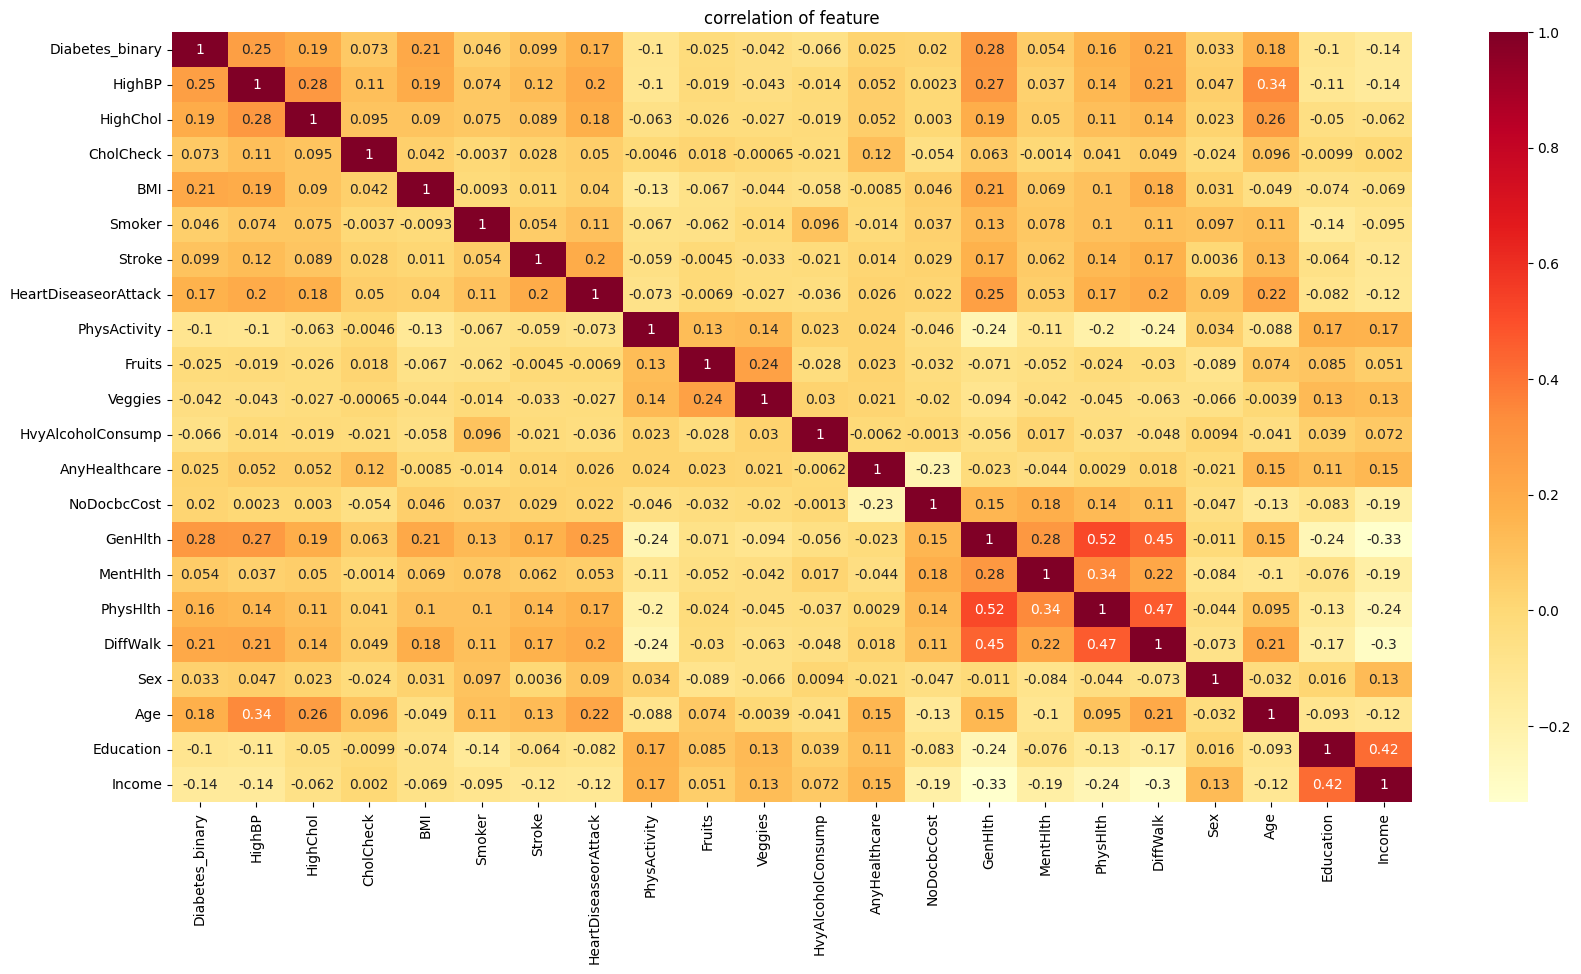

In [11]:

plt.figure(figsize = (20,10))
sns.heatmap(data.corr(),annot=True , cmap ='YlOrRd' )
plt.title("correlation of feature")
plt.show()


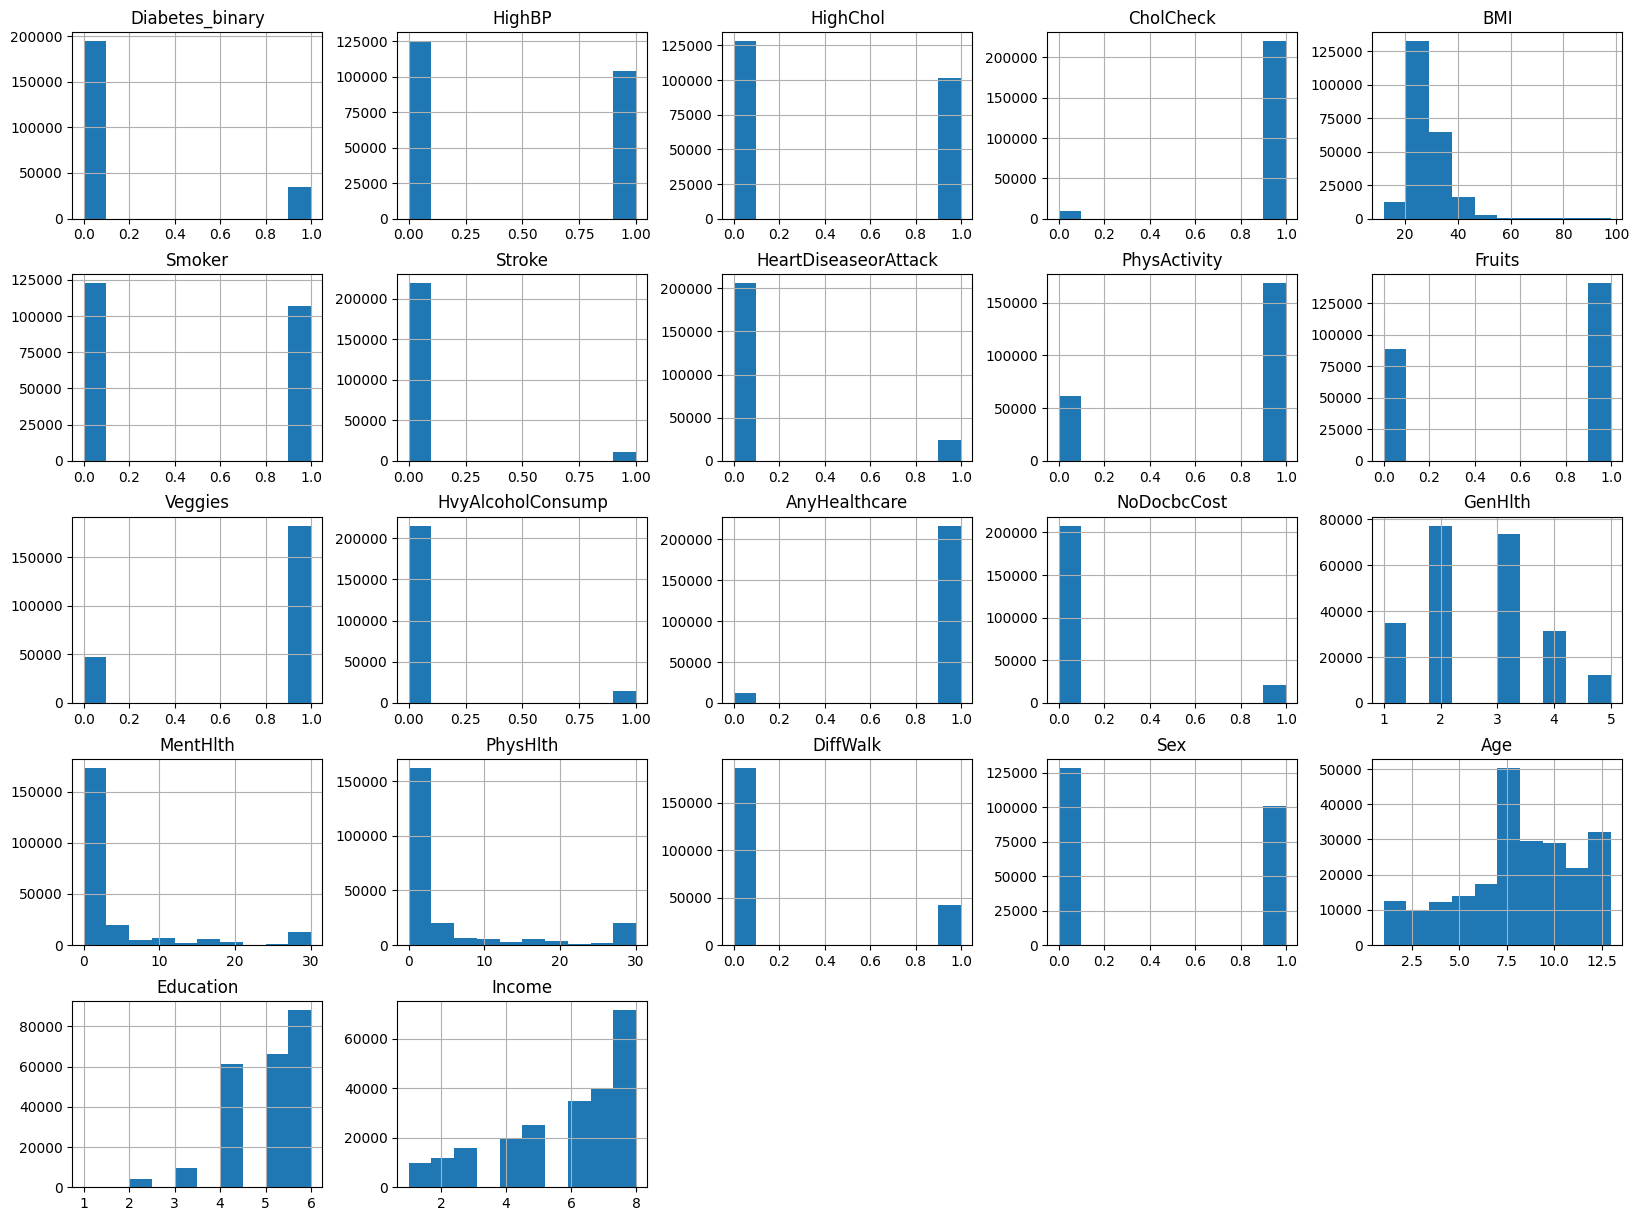

In [12]:
data.hist(figsize=(20,15));

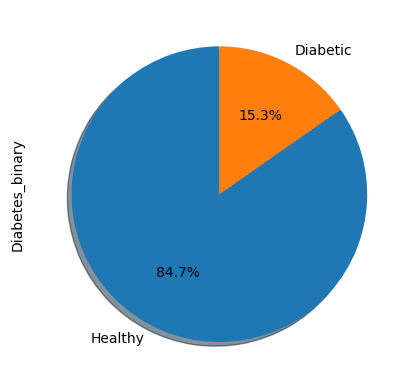

In [13]:
labels = 'Healthy','Diabetic'

data.Diabetes_binary.value_counts().plot.pie(labels=labels, autopct='%1.1f%%',shadow=True, startangle=90);

# Data Splitting

In [14]:
X=data.drop("Diabetes_binary",axis=1)
Y=data["Diabetes_binary"]

# Dealing with imbalancing

In [15]:
Y.value_counts()

0.0    194377
1.0     35097
Name: Diabetes_binary, dtype: int64

In [16]:
nm = NearMiss(version = 1 , n_neighbors = 10)

x_sm, y_sm = nm.fit_resample(X,Y)

In [17]:
y_sm.shape , x_sm.shape

((70194,), (70194, 21))

In [18]:
X_train , X_test , y_train , y_test = train_test_split(x_sm, y_sm, test_size=0.2 , random_state=42)

# Data Scalling

In [19]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)

# Modeling

## Logistic

In [20]:
lg = LogisticRegression(max_iter = 1500)
lg.fit(X_train , y_train)

LogisticRegression(max_iter=1500)

In [21]:
# make predictions on test set
y_pred = lg.predict(X_test)

print('Training set score: {:.4f}'.format(lg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(lg.score(X_test, y_test)))

Training set score: 0.8516
Test set score: 0.8501


In [23]:
matrix = classification_report(y_test,y_pred )
print(matrix)

              precision    recall  f1-score   support

         0.0       0.80      0.93      0.86      7012
         1.0       0.92      0.77      0.84      7027

    accuracy                           0.85     14039
   macro avg       0.86      0.85      0.85     14039
weighted avg       0.86      0.85      0.85     14039



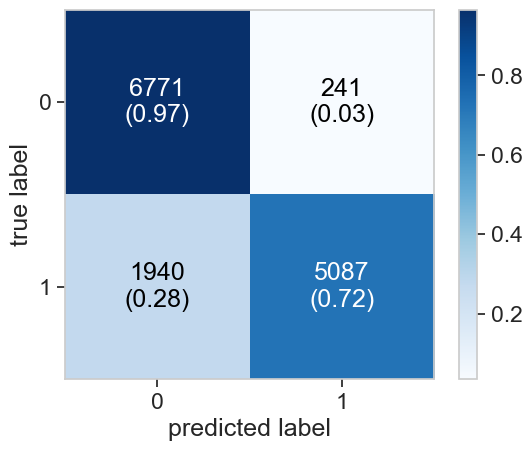

In [31]:
# calculating and plotting the confusion matrix
cm1 = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

## Desicion Tree model

In [27]:
dt = DecisionTreeClassifier(max_depth = 12)
dt.fit(X_train , y_train)

DecisionTreeClassifier(max_depth=12)

In [28]:
# make predictions on test set
y_pred=dt.predict(X_test)

print('Training set score: {:.4f}'.format(dt.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(dt.score(X_test, y_test)))

Training set score: 0.8623
Test set score: 0.8446


In [29]:
matrix = classification_report(y_test,y_pred )
print(matrix)

              precision    recall  f1-score   support

         0.0       0.78      0.97      0.86      7012
         1.0       0.95      0.72      0.82      7027

    accuracy                           0.84     14039
   macro avg       0.87      0.84      0.84     14039
weighted avg       0.87      0.84      0.84     14039



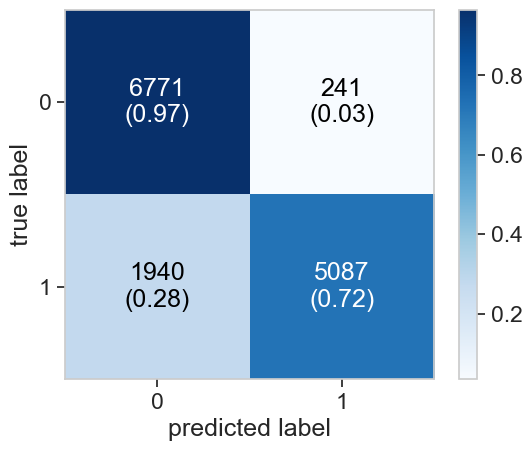

In [30]:
# calculating and plotting the confusion matrix
cm1 = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

## KNN

In [33]:
knn = KNeighborsClassifier(n_neighbors= 6 )
knn.fit(X_train , y_train)

KNeighborsClassifier(n_neighbors=6)

In [34]:
# make predictions on test set
y_pred=knn.predict(X_test)

print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))

Training set score: 0.8297
Test set score: 0.7886


In [35]:
matrix = classification_report(y_test,y_pred )
print(matrix)

              precision    recall  f1-score   support

         0.0       0.72      0.95      0.82      7012
         1.0       0.93      0.62      0.75      7027

    accuracy                           0.79     14039
   macro avg       0.82      0.79      0.78     14039
weighted avg       0.82      0.79      0.78     14039



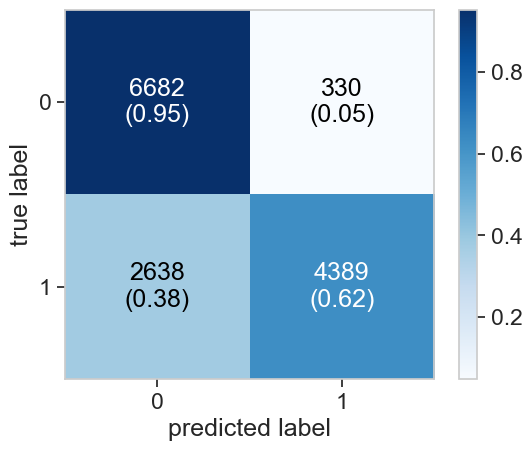

In [36]:
# calculating and plotting the confusion matrix
cm1 = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat=cm1,show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

## Neural Network 

In [44]:
input_shape = X.shape
num_classes = 1

In [45]:
model = keras.Sequential([
    layers.InputLayer(input_shape=(21,)),
    layers.Dense(units=64, activation=nn.relu),
    layers.BatchNormalization(),
    layers.Dense(units=256, activation=nn.relu),
    layers.BatchNormalization(),
    layers.Dense(units=64, activation=nn.relu),
    layers.BatchNormalization(),
    layers.Dense(units=256, activation=nn.relu),
    layers.BatchNormalization(),
    layers.Dense(units=64, activation=nn.relu),
    layers.BatchNormalization(),
    layers.Dense(units=32, activation=nn.relu),
    layers.Dense(units=1, activation=nn.sigmoid)
])

opt = Adam()
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [46]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 64)                1408      
                                                                 
 batch_normalization_5 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dense_8 (Dense)             (None, 256)               16640     
                                                                 
 batch_normalization_6 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dense_9 (Dense)             (None, 64)                16448     
                                                                 
 batch_normalization_7 (Batc  (None, 64)              

In [47]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=25)

Epoch 1/25
1755/1755 [==============================] - 6s 3ms/step - loss: 0.3784 - accuracy: 0.8280 - val_loss: 0.3323 - val_accuracy: 0.8533
Epoch 2/25
1755/1755 [==============================] - 4s 2ms/step - loss: 0.3334 - accuracy: 0.8543 - val_loss: 0.3148 - val_accuracy: 0.8622
Epoch 3/25
1755/1755 [==============================] - 4s 2ms/step - loss: 0.3201 - accuracy: 0.8627 - val_loss: 0.3128 - val_accuracy: 0.8634
Epoch 4/25
1755/1755 [==============================] - 4s 2ms/step - loss: 0.3136 - accuracy: 0.8644 - val_loss: 0.3078 - val_accuracy: 0.8689
Epoch 5/25
1755/1755 [==============================] - 4s 2ms/step - loss: 0.3110 - accuracy: 0.8668 - val_loss: 0.3024 - val_accuracy: 0.8692
Epoch 6/25
1755/1755 [==============================] - 4s 2ms/step - loss: 0.3060 - accuracy: 0.8688 - val_loss: 0.3047 - val_accuracy: 0.8693
Epoch 7/25
1755/1755 [==============================] - 3s 2ms/step - loss: 0.3033 - accuracy: 0.8699 - val_loss: 0.3034 - val_accuracy:

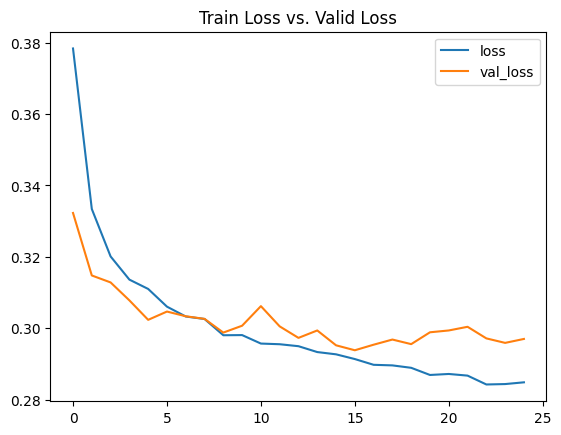

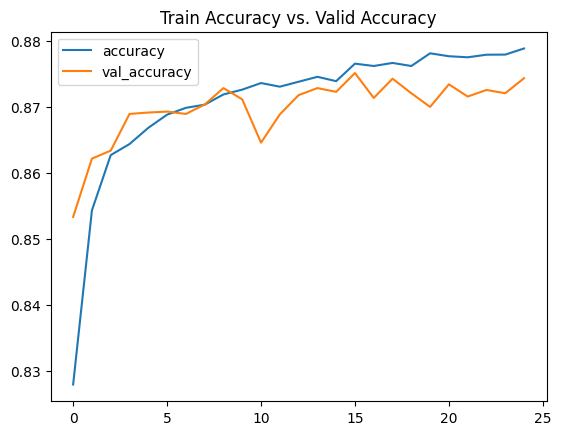

In [48]:
history_df = pd.DataFrame(hist.history)
history_df.loc[0:, ['loss', 'val_loss']].plot(title='Train Loss vs. Valid Loss')
history_df.loc[0:, ['accuracy', 'val_accuracy']].plot(title='Train Accuracy vs. Valid Accuracy');

In [49]:
y_predicted = model.predict(X_test)
y_predicted = [1.0 if y >= 0.5 else 0.0 for y in y_predicted]

439/439 [==============================] - 0s 758us/step


In [50]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

         0.0       0.82      0.97      0.88      7012
         1.0       0.96      0.78      0.86      7027

    accuracy                           0.87     14039
   macro avg       0.89      0.87      0.87     14039
weighted avg       0.89      0.87      0.87     14039



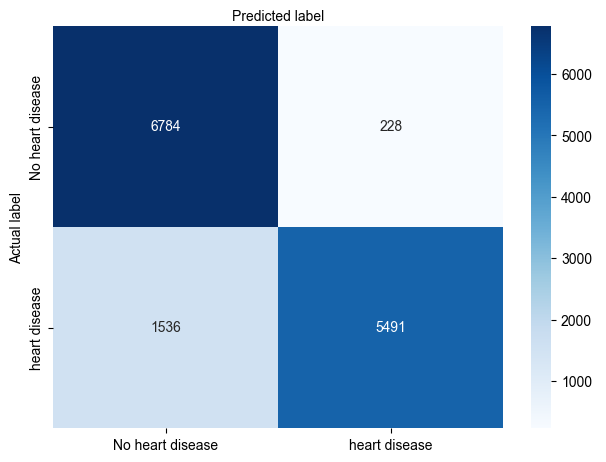

In [51]:
conf_mat = confusion_matrix(y_test, y_predicted)
class_names = ["No heart disease", "heart disease"]

fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

df_cm = pd.DataFrame(conf_mat, index=class_names, columns=class_names, )
sns.heatmap(df_cm, annot=True, cmap="Blues", fmt="d")
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

# Convert Model to ONNX

In [52]:
import tensorflow as tf
import tf2onnx
import onnx


input_signature = [tf.TensorSpec((None, 21), tf.float32, name='x')]
# Use from_function for tf functions
onnx_model, _ = tf2onnx.convert.from_keras(model, input_signature, opset=13)
onnx.save(onnx_model, "diabetes-model.onnx")